# 说在前面，此文件是我在尝试读取数据的图像和标签

# （根据官网的文件解释）。

# 还有尝试展示图像，需要转化成 28*28，且需要用灰度映射 

# cmap='gray'  # 使用灰度颜色映射

单层感知器是一种最简单的神经网络模型，其原理基于神经元的工作方式和感知器的数学模型。以下是单层感知器的基本原理：

1. **感知器模型：**
   - 单层感知器由输入、权重、激活函数和输出组成。
   - 输入是由输入特征构成的向量，每个特征乘以对应的权重。
   - 权重表示特征的重要性，通过训练过程动态调整。
   - 激活函数将输入的加权和映射到输出，通常使用阶跃函数或符号函数。

2. **数学模型：**
   - 输入向量：$X = [x_1, x_2, ..., x_n]$
   - 权重向量：$W = [w_1, w_2, ..., w_n]$
   - 激活函数：$f(z) = \text{sign}(z)$，其中 $z = \sum_{i=1}^{n}(x_i \cdot w_i) + b$，$b$ 是偏置。
   - 输出：$y = f(z)$

3. **训练过程（学习权重）：**
   - 初始化权重和偏置。
   - 对于每个训练样本，计算模型的输出。
   - 根据实际输出和期望输出之间的误差，调整权重和偏置，以减小误差。
   - 重复以上步骤直至达到停止条件（例如，达到最大迭代次数或误差小于某个阈值）。

4. **决策边界：**
   - 单层感知器在输入空间中找到一个超平面，将不同类别的样本分开。
   - 决策边界是由权重和偏置决定的，可以看作是一个线性分类器。

5. **局限性：**
   - 单层感知器只能解决线性可分问题，即存在一个超平面能够将正类别和负类别完全分开。
   - 对于线性不可分问题，单层感知器无法收敛。

6. **激活函数的选择：**
   - 阶跃函数是最经典的激活函数，但不可导，不适用于梯度下降优化。
   - 符号函数是阶跃函数的连续近似，通常用于实现。

总体而言，单层感知器是一种简单的线性分类器，其学习过程基于误差的反馈调整权重，目标是找到一个合适的超平面将输入空间中的样本划分为不同的类别。

# 1.导入库

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# 2.打开数据集

In [16]:
def load_mnist_images(filename):
    with open(filename, 'rb') as f:
        data = np.fromfile(f, dtype=np.uint8, count=-1)
    return data[16:].reshape(-1, 28*28) / 255.0

def load_mnist_labels(filename):
    with open(filename, 'rb') as f:
        data = np.fromfile(f, dtype=np.uint8, count=-1)
    return data[8:]

# 文件路径
train_images_file = 'train_data/train-images.idx3-ubyte'
train_labels_file = 'train_data/train-labels.idx1-ubyte'
test_images_file = 'test_data/t10k-images.idx3-ubyte'
test_labels_file = 'test_data/t10k-labels.idx1-ubyte'

X_train = load_mnist_images(train_images_file)
Y_train = load_mnist_labels(train_labels_file)

X_test = load_mnist_images(test_images_file)
Y_test = load_mnist_labels(test_labels_file)

### 2.1 定义函数

- `f`: 这是通过`open`函数创建的文件对象。
- `dtype=np.uint8`: 这指定从文件中读取的数据应该被视为无符号8位整数。换句话说，文件中的每个字节都将被视为一个取值范围从0到255的整数。
- `count=-1`: 这个参数表示从文件中读取的项目数（在这种情况下是整数）。当`count`设置为-1时，表示读取直到文件末尾的所有项目。

图像集：从第17个字节开始，将数据重新形状为28x28的图像，并将像素值缩放到0到1的范围。

标签集：从第9个字节开始，返回标签数据。


### 2.2 读取数据集

### 2.3 检验读取成功

In [17]:
print("Train Image Shape:", X_train.shape)
print("Train Label Shape:", Y_train.shape)
print("Test Image Shape:", X_test.shape)
print("Test Label Shape:", Y_test.shape)

Train Image Shape: (60000, 784)
Train Label Shape: (60000,)
Test Image Shape: (10000, 784)
Test Label Shape: (10000,)


In [18]:
first_image = X_train[0]
first_label = Y_train[0]

print("Type of first_image:", type(first_image))
print(first_image.size)

Type of first_image: <class 'numpy.ndarray'>
784


$784 = 28*28$

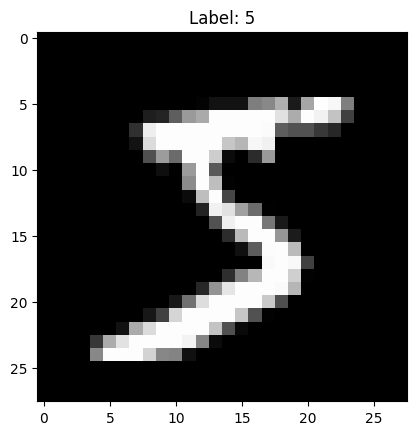

In [19]:
# 将图像数据还原为28x28的形状
image_reshaped = first_image.reshape(28, 28)

plt.imshow(image_reshaped, cmap='gray')  # 使用灰度颜色映射
plt.title(f"Label: {first_label}")
plt.show()

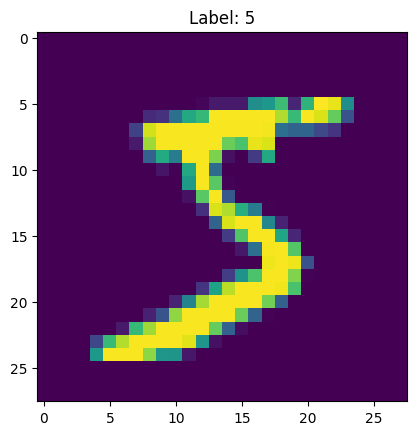

In [20]:
plt.imshow(image_reshaped)  # 未使用灰度颜色映射
plt.title(f"Label: {first_label}")
plt.show()

In [21]:
# print(image_reshaped)

# 3.标签转换

数字 6 标签为 1 ，其他数字标签为 -1

In [22]:
Y_train_binary = np.zeros_like(Y_train, dtype=np.int8)
Y_test_binary = np.zeros_like(Y_test, dtype=np.int8)

for i in range(len(Y_train)):
    if Y_train[i] == 6:
        Y_train_binary[i] = 1
    else:
        Y_train_binary[i] = -1

for i in range(len(Y_test)):
    if Y_test[i] == 6:
        Y_test_binary[i] = 1
    else:
        Y_test_binary[i] = -1

chatGPT: 可以通过 np 函数实现

In [23]:
# 将标签转换为+1和-1
# Y_train_binary = np.where(Y_train == 6, 1, -1)
# Y_test_binary = np.where(Y_test == 6, 1, -1)

# 4.验证集划分

### 4.1 定义函数

test_size 初始值是 0.2

random_state 初始值是 None

In [24]:
def split_dataset(X, y, test_size=0.2, random_state=None):
    # 获取数据集的长度
    data_size = len(X)
    
    # 根据比例计算验证集的大小
    val_size = int(test_size * data_size)
    
    # 设置随机种子
    if random_state is not None:
        np.random.seed(random_state)
    
    # 随机打乱数据集
    indices = np.random.permutation(data_size)
    
    # 划分数据集
    val_indices = indices[:val_size]
    train_indices = indices[val_size:]
    
    # 获取划分后的数据
    X_train, X_val = X[train_indices], X[val_indices]
    y_train, y_val = y[train_indices], y[val_indices]
    
    return X_train, X_val, y_train, y_val


1. `def split_dataset(X, y, test_size=0.2, random_state=None):`：定义了一个名为`split_dataset`的函数，它有四个参数：`X`（特征数据集），`y`（标签数据集），`test_size`（验证集的比例，默认为0.2），`random_state`（随机种子，用于保持可重复性，默认为None）。

2. `data_size = len(X)`：获取特征数据集`X`的长度，即数据集中样本的数量。

3. `val_size = int(test_size * data_size)`：根据指定的验证集比例计算验证集的大小，结果取整。

4. `if random_state is not None:`：检查是否提供了随机种子。

5. `np.random.seed(random_state)`：如果提供了随机种子，则设置NumPy的随机种子，以便在需要时可以复现相同的随机结果。

6. `indices = np.random.permutation(data_size)`：使用NumPy的`permutation`函数对数据集的索引进行随机排列，用于后续的数据集划分。

7. `val_indices = indices[:val_size]` 和 `train_indices = indices[val_size:]`：将随机打乱后的索引划分为验证集和训练集的索引。

8. `X_train, X_val = X[train_indices], X[val_indices]` 和 `y_train, y_val = y[train_indices], y[val_indices]`：根据划分好的索引，从原始数据集中获取训练集和验证集的特征和标签。

9. `return X_train, X_val, y_train, y_val`：返回划分后的训练集和验证集的特征和标签。

`indices = np.random.permutation(data_size)` 这行代码得到的结果是一个包含从0到`data_size-1`的随机排列索引的 NumPy 数组。这些索引用于重新排列对应的数据集（特征和标签），从而实现数据集的随机打乱。

例如，如果 `data_size` 为100，那么`indices`将是一个包含0到99的整数的随机排列数组。这样，你就可以根据这个数组重新排列原始数据集的相应部分。

### 4.2 数据集划分

In [25]:
train_feature, verify_feature, train_label, verify_label = \
    split_dataset(X_train, Y_train_binary, test_size=0.2, random_state=42)

# 5.初始化感知器

### 5.1 定义感知器

In [26]:
class SingleLayerPerceptron:
    def __init__(self, input_size):
        self.weights = np.random.rand(input_size)
        self.bias = np.random.rand(1)

    def predict(self, x):
        return np.sign(np.dot(x, self.weights) + self.bias)

    def train(self, x, y, learning_rate=0.01, epochs=50, stopping_threshold=0.01):
        errors = []

        for epoch in range(epochs):
            error = 0
            for xi, target in zip(x, y):
                update = learning_rate * (target - self.predict(xi))
                self.weights += update * xi
                self.bias += update
                error += int(update.item() != 0.0)

            errors.append(error / len(y))

            if error / len(y) < stopping_threshold:
                break

        return errors

In [27]:
input_size = train_feature.shape[1]             # 48000*784
print(input_size)                               # 784
perceptron = SingleLayerPerceptron(input_size)  # 784

784


In [28]:
print(perceptron.weights.shape)                 # (784,)
print(perceptron.bias.shape)                    # (1,)

(784,)
(1,)
